In [2]:
import numpy as np
import pandas as pd




In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
xl=pd.read_csv('j.csv')


In [6]:
print(xl)

   A note to self: You're not messed up, you're just too idle to align your life in the required way. You're not broken, you're just too idle to be strong; you're not depressed, you're just too idle to make yourself realise 'its nothing but a bad phase of life, and there is much much more beautiful happenings beyond this to relish. You're the best version of yourself when you wake up with the zeal to be the better version of what you were yesterday. PS : didn't want to sound philosophical, but I wanted to put this caption anyways. So..\n1 Year Ago\nManodipta Nath added a new photo.\n19 Mar 2019, 22:27\nA note to self: You're not messed up, you're just too idle to align your life in the required way. You're not broken, you're just too idle to be strong; you're not depressed, you're just too idle to make yourself realise 'its nothing but a bad phase of life, and there is much much more beautiful happenings beyond this to relish. You're the best version of yourself when you wake up with t

In [7]:
message=pd.read_csv('j.csv',sep='\t',names=['message'])
message['length']=message['message'].apply(len)

In [8]:
print(message['message'])

0     A note to self: You're not messed up, you're j...
1                                         Falling. I am
2      ~Not until our fate dances in the rhythm of t...
3     There's this certain something in the way he l...
4     The agony of snowflakes coruscating against th...
5     As you grow up, you see the deeper aspects of ...
6     1 Year Ago\n19 Feb 2019, 09:51\n?? Heart is in...
7                               \nSober and delusional.
8     "I love you from our very first day together, ...
9     What do I do after a haircut? Look at the old ...
10    The last three years, for me - have been a rig...
11    To more of such beautiful endings! ??\n1 Year ...
12    THIS IS FRIGGIN' TEASE!! 6TH IS TOO FAR ???\nU...
13             I genuinely wanted an insta-detox, but -
14    Of everything I've ever seemed myself to deal ...
15    HOW DOES THIS FEEL?\n"AAAAAHHHHHHHHHHHH"\n\nI ...
16    Just a reminder! All of me is still available ...
17    AAANNNDDD IT'S HERE! HIT THE LINK ON MY BI

In [9]:
sid=SentimentIntensityAnalyzer()

In [10]:
a=message['message']
for i in a:
    ss=sid.polarity_scores(i)
    print(i)
    for k in ss:
        print(k,ss[k])
    if(ss['compound']>=0.05):
        print("Positive Sentiment")
    elif(ss['compound']<=-0.05):
        print("negative Sentiment")
    else:
        print("Neutral Sentiment")
    print('_'*100)

A note to self: You're not messed up, you're just too idle to align your life in the required way. You're not broken, you're just too idle to be strong; you're not depressed, you're just too idle to make yourself realise 'its nothing but a bad phase of life, and there is much much more beautiful happenings beyond this to relish. You're the best version of yourself when you wake up with the zeal to be the better version of what you were yesterday. PS : didn't want to sound philosophical, but I wanted to put this caption anyways. So..
1 Year Ago
Manodipta Nath added a new photo.
19 Mar 2019, 22:27
A note to self: You're not messed up, you're just too idle to align your life in the required way. You're not broken, you're just too idle to be strong; you're not depressed, you're just too idle to make yourself realise 'its nothing but a bad phase of life, and there is much much more beautiful happenings beyond this to relish. You're the best version of yourself when you wake up with the zeal

In [91]:
###USING TOKENIZATION STEMMING AND REMOVING STOPWORDS


In [11]:

message['message'] = message['message'].str.lower()                    #TOKENIZATION
def identify_tokens(row):
    review = row['message']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

message['message'] = message.apply(identify_tokens, axis=1)
    

In [12]:
print(message['message'])

0     [a, note, to, self, you, not, messed, up, you,...
1                                      [falling, i, am]
2     [until, our, fate, dances, in, the, rhythm, of...
3     [there, this, certain, something, in, the, way...
4     [the, agony, of, snowflakes, coruscating, agai...
5     [as, you, grow, up, you, see, the, deeper, asp...
6     [year, ago, feb, heart, is, in, the, cries, of...
7                              [sober, and, delusional]
8     [i, love, you, from, our, very, first, day, to...
9     [what, do, i, do, after, a, haircut, look, at,...
10    [the, last, three, years, for, me, have, been,...
11    [to, more, of, such, beautiful, endings, year,...
12    [this, is, friggin, tease, is, too, far, updat...
13                      [i, genuinely, wanted, an, but]
14    [of, everything, i, ever, seemed, myself, to, ...
15    [how, does, this, feel, aaaaahhhhhhhhhhhh, i, ...
16    [just, a, reminder, all, of, me, is, still, av...
17    [aaannnddd, it, here, hit, the, link, on, 

In [13]:
from nltk.stem import PorterStemmer                        #STEMMING
stemming = PorterStemmer()
def stem_list(row):
    my_list = row['message']
    stemmed_list = [stemming.stem(mess) for mess in my_list]
    return (stemmed_list)

message['message'] = message.apply(stem_list, axis=1)

In [14]:
print(message['message'])

0     [a, note, to, self, you, not, mess, up, you, j...
1                                         [fall, i, am]
2     [until, our, fate, danc, in, the, rhythm, of, ...
3     [there, thi, certain, someth, in, the, way, he...
4     [the, agoni, of, snowflak, corusc, against, th...
5     [as, you, grow, up, you, see, the, deeper, asp...
6     [year, ago, feb, heart, is, in, the, cri, of, ...
7                                [sober, and, delusion]
8     [i, love, you, from, our, veri, first, day, to...
9     [what, do, i, do, after, a, haircut, look, at,...
10    [the, last, three, year, for, me, have, been, ...
11    [to, more, of, such, beauti, end, year, ago, m...
12    [thi, is, friggin, teas, is, too, far, updat, ...
13                           [i, genuin, want, an, but]
14    [of, everyth, i, ever, seem, myself, to, deal,...
15    [how, doe, thi, feel, aaaaahhhhhhhhhhhh, i, ca...
16    [just, a, remind, all, of, me, is, still, avai...
17    [aaannnddd, it, here, hit, the, link, on, 

In [15]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  #TOKENIZATION

def remove_stops(row):
    my_list = row['message']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

message['message'] = message.apply(remove_stops, axis=1)

In [16]:
print(message['message'])

0     [note, self, mess, idl, align, life, requir, w...
1                                                [fall]
2     [fate, danc, rhythm, moon, someday, somewher, ...
3     [thi, certain, someth, way, look, much, love, ...
4     [agoni, snowflak, corusc, wrath, raucou, sunbe...
5     [grow, see, deeper, aspect, life, well, perhap...
6     [year, ago, feb, heart, cri, canopi, paint, ca...
7                                     [sober, delusion]
8     [love, veri, first, day, togeth, mommi, love, ...
9                    [haircut, look, old, pictur, sulk]
10    [last, three, year, rigor, process, learn, unl...
11    [beauti, end, year, ago, manodipta, nath, ad, ...
12                [thi, friggin, teas, far, updat, dec]
13                                       [genuin, want]
14    [everyth, ever, seem, deal, terrifi, chang, wh...
15    [doe, thi, feel, aaaaahhhhhhhhhhhh, ca, come, ...
16    [remind, still, avail, writersgram, public, fa...
17    [aaannnddd, hit, link, bio, get, sampl, wa

In [17]:
def rejoin_words(row):
    my_list = row['message']
    joined_words = ( " ".join(my_list))
    return joined_words

message['message'] = message.apply(rejoin_words, axis=1)

In [18]:
print(message['message'])

0     note self mess idl align life requir way broke...
1                                                  fall
2     fate danc rhythm moon someday somewher somehow...
3     thi certain someth way look much love though p...
4     agoni snowflak corusc wrath raucou sunbeam ben...
5     grow see deeper aspect life well perhap far be...
6     year ago feb heart cri canopi paint canva colo...
7                                        sober delusion
8     love veri first day togeth mommi love much maa...
9                          haircut look old pictur sulk
10    last three year rigor process learn unlearn th...
11    beauti end year ago manodipta nath ad new phot...
12                       thi friggin teas far updat dec
13                                          genuin want
14    everyth ever seem deal terrifi chang whether g...
15    doe thi feel aaaaahhhhhhhhhhhh ca come explain...
16    remind still avail writersgram public facebook...
17    aaannnddd hit link bio get sampl wait guy 

In [29]:
a=message['message']
positive=0
negative=0
neutral=0
arr=[]
for i in a:
    ss=sid.polarity_scores(i)
    print(i)
    for k in ss:
        print(k,ss[k])
    arr.append(ss['compound'])
    if(ss['compound']>=0.05):
        print("Positive Sentiment")
        positive+=1
    elif(ss['compound']<=-0.05):
        print("negative Sentiment")
        negative+=1
    else:
        print("Neutral Sentiment")
        neutral+=1
    print('_'*100)

note self mess idl align life requir way broken idl strong depress idl make realis noth bad phase life much much beauti happen beyond thi relish best version wake zeal better version yesterday ps want sound philosoph want put thi caption anyway year ago manodipta nath ad new photo mar note self mess idl align life requir way broken idl strong depress idl make realis noth bad phase life much much beauti happen beyond thi relish best version wake zeal better version yesterday ps want sound philosoph want put thi caption anyway
neg 0.197
neu 0.594
pos 0.209
compound -0.1531
negative Sentiment
____________________________________________________________________________________________________
fall
neg 0.0
neu 1.0
pos 0.0
compound 0.0
Neutral Sentiment
____________________________________________________________________________________________________
fate danc rhythm moon someday somewher somehow star would twinkl shine eye would speak pain smile would behold happi heart would scream name 

In [23]:
import matplotlib.pyplot as plt
print(positive,negative,neutral)

60.0 6.41025641025641 16.370681304488215


In [24]:
positiv=((positive)/(positive+neutral+negative))*100
negativ=((negative)/(positive+neutral+negative))*100
neutra=((neutral)/(positive+neutral+negative))*100
print(positiv,negativ,neutra)

72.48045462683015 7.74363831483228 19.775907058337577


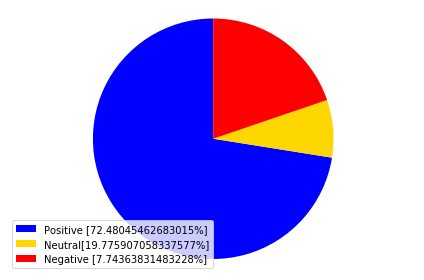

In [26]:
labels=['Positive ['+str(positiv)+'%]','Neutral['+str(neutra)+'%]','Negative ['+str(negativ)+'%]']
sizes=[positiv,negativ,neutra]
colors=['blue','gold','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [30]:
print(arr)

[-0.1531, 0.0, 0.34, 0.996, 0.0, 0.8964, 0.6369, 0.0, 0.9274, 0.0, 0.9853, 0.0, 0.1513, 0.0772, 0.9403, 0.9186, 0.2023, 0.4767, 0.8689, 0.0, 0.4019, -0.8442, 0.8316, -0.1027, -0.0258, 0.0, 0.9612, 0.8834, 0.1476, -0.1027, 0.0258, -0.1531, 0.8402, 0.34, 0.8481, 0.6369, 0.1779, 0.5267, 0.0, 0.4215, 0.0, 0.2263, 0.0, 0.0, 0.9757]


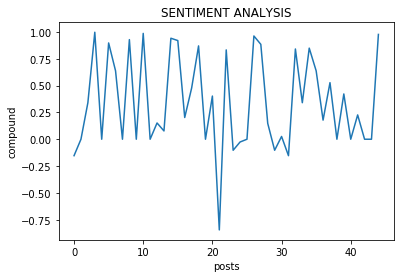

In [32]:
plt.plot(arr, label='sentiment')
plt.title('SENTIMENT ANALYSIS')
plt.ylabel('compound')
plt.xlabel('posts')

plt.show()

In [33]:
######TEXTBLOB

In [45]:
from textblob import TextBlob    #We can see that polarity is 0.8, which means that the statement is positive and 0.75 subjectivity refers that mostly it is a public opinion and not a factual information.
a=message['message']
pol=[]
sub=[]
for i in a:
    blob = TextBlob(i)
    
    b=blob.correct()
    print(b.sentiment)
    pol.append(b.sentiment.polarity)
    sub.append(b.sentiment.subjectivity)

Sentiment(polarity=0.06478787878787877, subjectivity=0.5308484848484849)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.47662337662337656, subjectivity=0.5506493506493507)
Sentiment(polarity=0.2392080745341615, subjectivity=0.5199534161490682)
Sentiment(polarity=0.05, subjectivity=0.7)
Sentiment(polarity=0.29863636363636364, subjectivity=0.5387878787878788)
Sentiment(polarity=0.45, subjectivity=0.6499999999999999)
Sentiment(polarity=0.1, subjectivity=0.2)
Sentiment(polarity=0.255, subjectivity=0.48666666666666664)
Sentiment(polarity=0.1, subjectivity=0.2)
Sentiment(polarity=0.15022077922077923, subjectivity=0.5514025974025974)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.1, subjectivity=1.0)
Sentiment(polarity=0.4, subjectivity=0.5)
Sentiment(polarity=0.12963286713286715, subjectivity=0.5717948717948718)
Sentiment(polarity=0.5499999999999999, subjectivity=0.6666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0833333

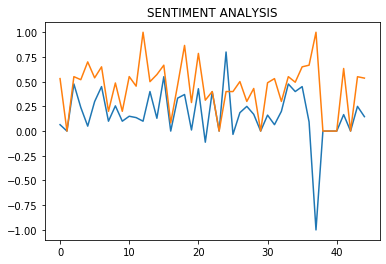

In [49]:
plt.plot(pol, label='polarity')
plt.plot(sub, label='subjectivity')
plt.title('SENTIMENT ANALYSIS')
plt.show()